In [11]:
import pandas as pd
from pybrainlife.data.collect import collect_data
import pybrainlife.data.manipulate as pybldm
import pybrainlife.vis.plots as pyblvp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install --upgrade pybrainlife

In [4]:
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('neuro/tractmeasures',['macro'],['step_size_0p1','step_size_0p2','step_size_0p05',
                                    'step_size_0p4', 'step_size_0p5', 'step_size_0p6', 'step_size_0p8', 'step_size_1p0'],
                                    'tractmeasures.csv','tractmeasures_step_size.csv')
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
0,wbfg,1164,12062,62.240483,13.776679,45.182413,10.813502,0.0082,0.043536,72447.921853,...,NaN,NaN,1.000000,1.000000,1.000000,100307,1,"[2_24_2023, step_size_0p1]","[roi_trekker, macro]",2023-02-26T21:01:16.397Z
1,ROI_thalamus-8115_ROI_lh.onset,252,4816,70.848005,6.230928,49.387757,2.405886,NaN,NaN,17853.697216,...,11.544541,3.282925,0.399270,0.216495,0.246435,100307,1,"[2_24_2023, step_size_0p1]","[roi_trekker, macro]",2023-02-26T21:01:16.397Z
2,ROI_thalamus-8115_ROI_lh.pmhg,205,2174,43.281922,17.652656,24.419316,2.624865,NaN,NaN,8872.793957,...,9.265458,4.391805,0.180235,0.176117,0.122471,100307,1,"[2_24_2023, step_size_0p1]","[roi_trekker, macro]",2023-02-26T21:01:16.397Z
3,ROI_thalamus-8215_ROI_rh.onset,637,5384,66.323027,5.576307,51.520714,2.095170,NaN,NaN,42247.768078,...,8.447796,3.833070,0.446360,0.547251,0.583147,100307,1,"[2_24_2023, step_size_0p1]","[roi_trekker, macro]",2023-02-26T21:01:16.397Z
4,ROI_thalamus-8215_ROI_rh.pmhg,70,1081,49.623751,14.002985,33.170853,5.132663,NaN,NaN,3473.662602,...,6.780974,6.699058,0.089620,0.060137,0.047947,100307,1,"[2_24_2023, step_size_0p1]","[roi_trekker, macro]",2023-02-26T21:01:16.397Z


In [5]:
tractmeasures_df['tags'] = [ f[1] for f in tractmeasures_df.tags ]
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['structureID'] != 'wbfg']
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
1,ROI_thalamus-8115_ROI_lh.onset,252,4816,70.848005,6.230928,49.387757,2.405886,NaN,NaN,17853.697216,...,11.544541,3.282925,0.399270,0.216495,0.246435,100307,1,step_size_0p1,"[roi_trekker, macro]",2023-02-26T21:01:16.397Z
2,ROI_thalamus-8115_ROI_lh.pmhg,205,2174,43.281922,17.652656,24.419316,2.624865,NaN,NaN,8872.793957,...,9.265458,4.391805,0.180235,0.176117,0.122471,100307,1,step_size_0p1,"[roi_trekker, macro]",2023-02-26T21:01:16.397Z
3,ROI_thalamus-8215_ROI_rh.onset,637,5384,66.323027,5.576307,51.520714,2.095170,NaN,NaN,42247.768078,...,8.447796,3.833070,0.446360,0.547251,0.583147,100307,1,step_size_0p1,"[roi_trekker, macro]",2023-02-26T21:01:16.397Z
4,ROI_thalamus-8215_ROI_rh.pmhg,70,1081,49.623751,14.002985,33.170853,5.132663,NaN,NaN,3473.662602,...,6.780974,6.699058,0.089620,0.060137,0.047947,100307,1,step_size_0p1,"[roi_trekker, macro]",2023-02-26T21:01:16.397Z
1,ROI_thalamus-8115_ROI_lh.onset,358,4593,64.490744,7.091555,48.694280,1.665972,NaN,NaN,23087.686295,...,6.056424,5.242979,0.451800,0.298085,0.357411,101107,1,step_size_0p1,"[roi_trekker, macro]",2023-02-26T21:01:23.460Z


In [15]:
colorsPoss = ['blue', 'orange', 'green', 'red', 'purple', 'cadetblue', 'magenta', 'seagreen']
colors = colorsPoss[:len(tractmeasures_df.tags.unique())]
labels = ['lh.onset', 'lh.pmhg', 'rh.onset', 'rh.pmhg']

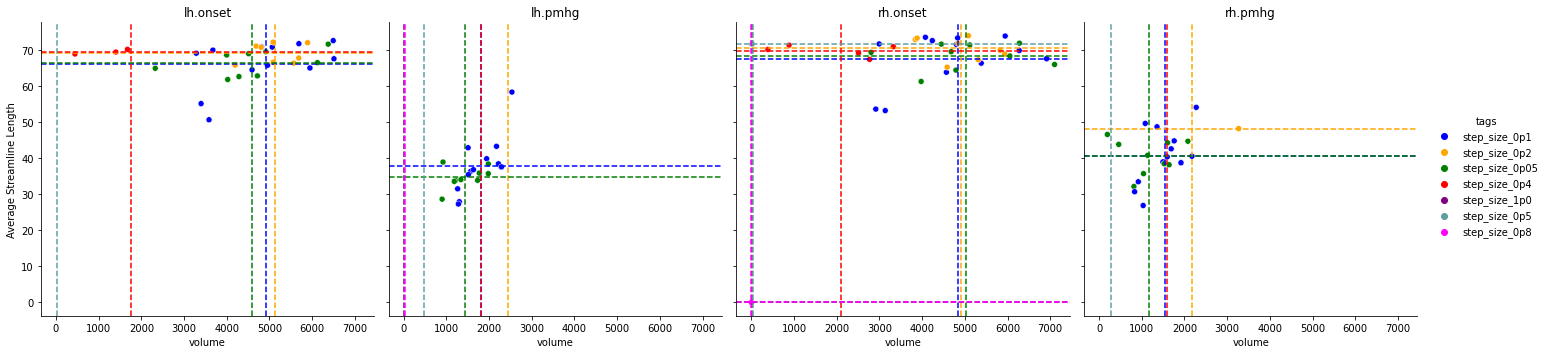

In [26]:
g = sns.relplot(x='volume',y='avgerageStreamlineLength',data=tractmeasures_df,hue='tags',col='structureID', palette = colors)

meansVol = []
meansLen = []

for tractID in tractmeasures_df.structureID.unique():
    for stepsize in tractmeasures_df.tags.unique():
        temp = tractmeasures_df[(tractmeasures_df['structureID'] == tractID) & (tractmeasures_df['tags'] == stepsize)]
        meansVol.append(temp.volume.mean())
        meansLen.append(temp.avgerageStreamlineLength.mean())
        
idx = 0
label_i = 0
for ax in g.axes.flat:
    for i in range(len(tractmeasures_df.tags.unique())):
        ax.axvline(meansVol[idx], ls = '--', color = colors[i])
        ax.axhline(meansLen[idx], ls = '--', color = colors[i])
        idx += 1
    ax.set_title(labels[label_i])
    if label_i == 0:
        ax.set_ylabel('Average Streamline Length')
    label_i += 1

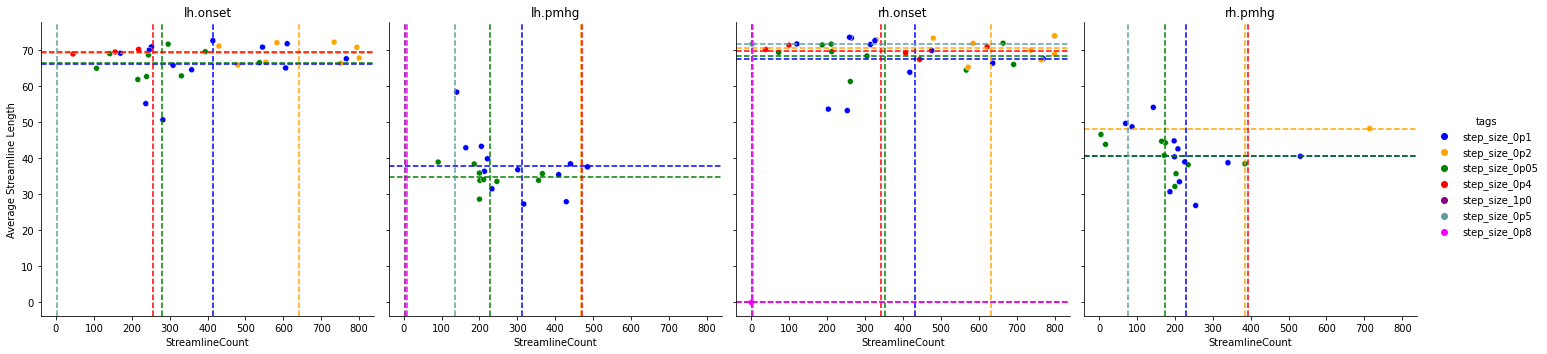

In [27]:
g = sns.relplot(x='StreamlineCount',y='avgerageStreamlineLength',data=tractmeasures_df,hue='tags',col='structureID', palette = colors)

meansCount = []
meansLen = []

for tractID in tractmeasures_df.structureID.unique():
    for stepsize in tractmeasures_df.tags.unique():
        temp = tractmeasures_df[(tractmeasures_df['structureID'] == tractID) & (tractmeasures_df['tags'] == stepsize)]
        meansCount.append(temp.StreamlineCount.mean())
        meansLen.append(temp.avgerageStreamlineLength.mean())
        
idx = 0
label_i = 0
for ax in g.axes.flat:
    for i in range(len(tractmeasures_df.tags.unique())):
        ax.axvline(meansCount[idx], ls = '--', color = colors[i])
        ax.axhline(meansLen[idx], ls = '--', color = colors[i])
        idx += 1
    ax.set_title(labels[label_i])
    if label_i == 0:
        ax.set_ylabel('Average Streamline Length')
    label_i += 1

In [9]:
tractmeasures_df.groupby(['structureID', 'tags']).count()

StreamlineCount  volume  \
structureID                    tags                                      
ROI_thalamus-8115_ROI_lh.onset step_size_0p05                9       9   
                               step_size_0p1                13      13   
                               step_size_0p2                 8       8   
                               step_size_0p4                 9       9   
                               step_size_0p5                 2       2   
ROI_thalamus-8115_ROI_lh.pmhg  step_size_0p05                9       9   
                               step_size_0p1                13      13   
                               step_size_0p2                 8       8   
                               step_size_0p4                 9       9   
                               step_size_0p5                 3       3   
                               step_size_0p8                 3       3   
                               step_size_1p0                 2       2   
ROI_thalamus-8215_ROI_rh.onset step_size_0p05                9       9   
                               step_size_0p1                13      13   
                               step_size_0p2                 8       8   
                               step_size_0p4                 9       9   
                               step_size_0p5                 3       3   
                               step_size_0p8                 3       3   
                               step_size_1p0                 2       2   
ROI_thalamus-8215_ROI_rh.pmhg  step_size_0p05                9       9   
                               step_size_0p1                13      13   
                               step_size_0p2                 8       8   
                               step_size_0p4                 9       9   
                               step_size_0p5                 3       3   

                                               avgerageStreamlineLength  \
structureID                    tags                                       
ROI_thalamus-8115_ROI_lh.onset step_size_0p05                         9   
                               step_size_0p1                         13   
                               step_size_0p2                          8   
                               step_size_0p4                          3   
                               step_size_0p5                          0   
ROI_thalamus-8115_ROI_lh.pmhg  step_size_0p05                         9   
                               step_size_0p1                         13   
                               step_size_0p2                          0   
                               step_size_0p4                          0   
                               step_size_0p5                          0   
                               step_size_0p8                          0   
                               step_size_1p0                          0   
ROI_thalamus-8215_ROI_rh.onset step_size_0p05                         9   
                               step_size_0p1                         13   
                               step_size_0p2                          8   
                               step_size_0p4                          5   
                               step_size_0p5                          2   
                               step_size_0p8                          2   
                               step_size_1p0                          1   
ROI_thalamus-8215_ROI_rh.pmhg  step_size_0p05                         9   
                               step_size_0p1                         13   
                               step_size_0p2                          1   
                               step_size_0p4                          0   
                               step_size_0p5                          0   

                                               streamlineLengthStdev  \
structureID                    tags                                    
ROI_thalamus-8115_ROI_lh.on